In [1]:
import pandas as pd
from sklearn.datasets import load_boston

## 載入資料 ＆ 資料前處理
這dataset很乾淨所以只要把資料載入，並做成DataFrame就好

In [2]:
boston= load_boston()
df=pd.DataFrame(boston['data'],columns=boston['feature_names'],)
df['Ans']=boston['target']

In [3]:
boston.keys()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## import  train_test_split 
從dataset中分割資料，切一部分出來做驗證資料集

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(boston['data'],boston['target'],test_size=0.1)

# import 決策術分類方法，並fit training data

In [5]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=3)
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# graphviz 畫圖

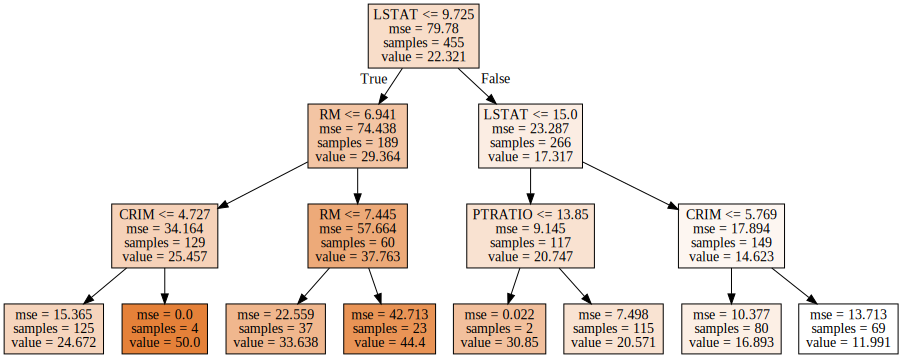

In [6]:
from sklearn.tree import export_graphviz
import graphviz
g=export_graphviz(reg,feature_names=boston['feature_names'],filled=True)
graphviz.Source(g)

# 如何頻估回歸模型好壞 Ｒ＾2

In [7]:
from sklearn.metrics import r2_score
pre=reg.predict(x_test)

In [8]:
r2_score(y_test,pre)

0.7592938786674733

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
for i in range(1,10):
    reg=DecisionTreeRegressor(max_depth=i)
    reg.fit(x_train,y_train)
    pre=reg.predict(x_test)
    print('{}===>{}'.format(i,r2_score(y_test,pre)))

1===>0.422929092486963
2===>0.7536177921102326
3===>0.8704610530652243
4===>0.8826641177950952
5===>0.885420083225051
6===>0.8890174608783002
7===>0.838012007875657
8===>0.8084633569620846
9===>0.7137892823314358
